#### Importing Warnings and Other Libraries

In [40]:
#importing the warnings.
import warnings
warnings.filterwarnings("ignore")

In [42]:
#importing the useful libraries.
import os
import sys
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [43]:
#read the data set of "application_data" and "previous_application" in inp_app and inp_prev respectively.
inp_app= pd.read_csv("application_data.csv")
inp_prev = pd.read_csv("previous_application.csv")

#### Let's Start Analyzing Application_data first

In [44]:
#Reading the first 10 records from the table
inp_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#checking the percentage of missing values in columns as taught by Shivam sir
(100*inp_app.isnull().sum()/inp_app.shape[0]).reset_index().rename\
(columns={"index":"Feature",0:"Missing Percentage"}).sort_values("Missing Percentage",\
                                                                 ascending=False)

,Feature,Missing Percentage
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
...,...,...
15,NAME_HOUSING_TYPE,0.000000
14,NAME_FAMILY_STATUS,0.000000
13,NAME_EDUCATION_TYPE,0.000000
12,NAME_INCOME_TYPE,0.000000


#### Dropping Columns which have more than 50% missing value and The columns which I find Irrelevant

In [46]:
#There are columns with around 70% missing values
#The description - Normalized information about building where the client lives etc for the 5 columns with 69%+ missing values
# Remove column name 'COMMONAREA_MEDI' as I find this column to be irrelevant for credit analysis
inp_app = inp_app.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG','COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG'], axis = 1)

In [47]:
#Dropping columns MT_REQ_CREDIT_BUREAU_HOUR,MT_REQ_CREDIT_BUREAU_DAY, MT_REQ_CREDIT_BUREAU_WEEK, MT_REQ_CREDIT_BUREAU_MON and
#MT_REQ_CREDIT_BUREAU_QRT, MT_REQ_CREDIT_BUREAU_YEAR as they are not relevant either
inp_app = inp_app.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1)

In [48]:
#let's check the shape of our dataset now, and see if the columns are deleted or not
inp_app.shape

(307511, 111)

In [49]:
#dropping columns related to normalized information about house where the client lives
inp_app = inp_app.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG'], axis = 1)
inp_app = inp_app.drop(['LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE'], axis = 1)
inp_app = inp_app.drop(['ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI'], axis = 1)
inp_app = inp_app.drop(['BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI'],axis = 1)
inp_app = inp_app.drop(['LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'], axis = 1)

In [50]:
inp_app.shape #let's check the shape of our dataset again

(307511, 69)

In [51]:
#checking the percentage of missing values in columns as taught by Shivam sir
(100*inp_app.isnull().sum()/inp_app.shape[0]).reset_index().rename\
(columns={"index":"Feature",0:"Missing Percentage"}).sort_values("Missing Percentage",\
                                                                 ascending=False)

,Feature,Missing Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
28,OCCUPATION_TYPE,31.345545
43,EXT_SOURCE_3,19.825307
11,NAME_TYPE_SUITE,0.420148
...,...,...
32,WEEKDAY_APPR_PROCESS_START,0.000000
33,HOUR_APPR_PROCESS_START,0.000000
1,TARGET,0.000000
35,REG_REGION_NOT_WORK_REGION,0.000000


#### Dropping the columns which I find Irrelevant

In [53]:
inp_app = inp_app.drop(['NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI'], axis = 1)
inp_app = inp_app.drop(['ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI'],axis=1)
inp_app = inp_app.drop(['FLOORSMIN_AVG', 'FLOORSMIN_MODE','FLOORSMIN_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE'], axis = 1)
inp_app = inp_app.drop(['YEARS_BUILD_MEDI', 'OWN_CAR_AGE','LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE'], axis = 1)
inp_app = inp_app.drop(['BASEMENTAREA_AVG', 'BASEMENTAREA_MODE','BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG'], axis = 1)
inp_app = inp_app.drop(['NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI','ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE'], axis = 1)
inp_app = inp_app.drop(['WALLSMATERIAL_MODE', 'APARTMENTS_AVG','APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI'], axis = 1)

KeyError: "['NONLIVINGAPARTMENTS_MEDI' 'FONDKAPREMONT_MODE' 'LIVINGAPARTMENTS_AVG'\n 'LIVINGAPARTMENTS_MODE' 'LIVINGAPARTMENTS_MEDI'] not found in axis"

In [56]:
inp_app[['OWN_CAR_AGE']]

,OWN_CAR_AGE
0,NaN
1,NaN
2,26.0
3,NaN
4,NaN
...,...
307506,NaN
307507,NaN
307508,NaN
307509,NaN


In [57]:
inp_app = inp_app.drop(["OWN_CAR_AGE"],axis =1)

In [58]:
#Now Let's see for null value counts for all columns
inp_app.isnull().sum().sort_values(ascending=False)


EXT_SOURCE_1                  173378
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
                               ...  
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
TARGET                             0
FLAG_DOCUMENT_21                   0
Length: 68, dtype: int64

In [59]:
#Dropping some more columns below from dataset, as I find them irrelevant
inp_app = inp_app.drop(['HOUSETYPE_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI'], axis = 1)
inp_app = inp_app.drop(['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis = 1)


KeyError: "['HOUSETYPE_MODE' 'FLOORSMAX_MEDI' 'FLOORSMAX_MODE' 'FLOORSMAX_AVG'\n 'YEARS_BEGINEXPLUATATION_MEDI'] not found in axis"

In [61]:
inp_app.shape #let's confirm the shape first

(307511, 68)

#### Let's Go through important Columns with missing values and impute values if necessary

In [62]:
#It's a categorical variable, let's see the categories and the % of entry each category has
inp_app.OCCUPATION_TYPE.value_counts(normalize=True) 

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [63]:
inp_app.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [64]:
#Looks like the Missing values are Not At Random(MNAR), Some people might not want to share their occupation
#let's impute these fields with "Missing"
inp_app["OCCUPATION_TYPE"] = inp_app["OCCUPATION_TYPE"].fillna("Missing") 

In [65]:
#Let's check if there are any null values left in Occupation_type or not
inp_app["OCCUPATION_TYPE"].isnull().sum()

0

#### Univariate analysis of OCCUPATION_TYPE using bar plot

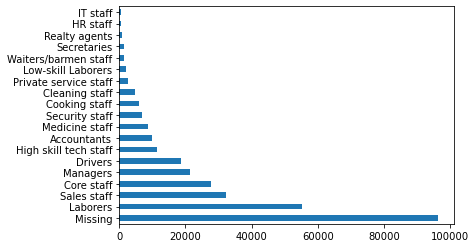

In [66]:
inp_app["OCCUPATION_TYPE"].value_counts().plot.barh()
plt.show() #Looks like labourers category is the highest

My Target variables - Age, job exp, target(1/0), contract type, Gender, owns house, car, have children, Total income, credit amount, income type, education, loan annuity, organisation type. I have gone through the column description provided and problem statements and decided to consider above mentioned columns as my target. 
Check each variable dtype, treat missing values, find outliers(if any and necessary), then analyse

In [67]:
inp_app.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [68]:
inp_app['DAYS_BIRTH']= abs(inp_app['DAYS_BIRTH'])

In [69]:
#Let's create new column Age and change days_birth values to years
inp_app["AGE"] = inp_app["DAYS_BIRTH"]/365

In [70]:
inp_app.AGE.describe() #looks like it worked

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [71]:
#I noticed there are four other columns with days value in it.
#Let's check if they too have negative values or correct ones.
inp_app[['DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED']].head(10) #let's see all 4 columns together

,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED
0,-3648.0,-2120,-1134.0,-637
1,-1186.0,-291,-828.0,-1188
2,-4260.0,-2531,-815.0,-225
3,-9833.0,-2437,-617.0,-3039
4,-4311.0,-3458,-1106.0,-3038
5,-4970.0,-477,-2536.0,-1588
6,-1213.0,-619,-1562.0,-3130
7,-4597.0,-2379,-1070.0,-449
8,-7427.0,-3514,0.0,365243
9,-14437.0,-3992,-1673.0,-2019


In [72]:
#let's change the values to positive values 
Day_Var = ["DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
inp_app[Day_Var]= abs(inp_app[Day_Var])

In [73]:
#let's check if that worked
inp_app[Day_Var].describe()

,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307510.000000
mean,67724.742149,4986.120328,2994.202373,962.858788
std,139443.751806,3522.886321,1509.450419,826.808487
min,0.000000,0.000000,0.000000,0.000000
25%,933.000000,2010.000000,1720.000000,274.000000
50%,2219.000000,4504.000000,3254.000000,757.000000
75%,5707.000000,7479.500000,4299.000000,1570.000000
max,365243.000000,24672.000000,7197.000000,4292.000000


In [74]:
#Now, Let's convert them into years one by one
inp_app["YEARS_EMPLOYED"] = inp_app["DAYS_EMPLOYED"]/365
inp_app["YEARS_REGST"] = inp_app["DAYS_REGISTRATION"]/365
inp_app["YEARS_ID_PUB"] = inp_app["DAYS_ID_PUBLISH"]/365
inp_app["YEARS_PHN_CHG"] = inp_app["DAYS_LAST_PHONE_CHANGE"]/365

In [75]:
inp_app[['YEARS_EMPLOYED','YEARS_REGST', 'YEARS_ID_PUB', 'YEARS_PHN_CHG']].head(10) #Changes have appeared as our requirement

,YEARS_EMPLOYED,YEARS_REGST,YEARS_ID_PUB,YEARS_PHN_CHG
0,1.745205,9.994521,5.808219,3.106849
1,3.254795,3.249315,0.797260,2.268493
2,0.616438,11.671233,6.934247,2.232877
3,8.326027,26.939726,6.676712,1.690411
4,8.323288,11.810959,9.473973,3.030137
5,4.350685,13.616438,1.306849,6.947945
6,8.575342,3.323288,1.695890,4.279452
7,1.230137,12.594521,6.517808,2.931507
8,1000.665753,20.347945,9.627397,0.000000
9,5.531507,39.553425,10.936986,4.583562


In [76]:
#Now, that we have dealt with days columns let's see the rest of the null value columns
(100*inp_app.isnull().sum()/inp_app.shape[0]).reset_index().rename\
(columns={"index":"Feature",0:"Missing Percentage"}).sort_values("Missing Percentage",\
                                                                 ascending=False)

,Feature,Missing Percentage
40,EXT_SOURCE_1,56.381073
42,EXT_SOURCE_3,19.825307
11,NAME_TYPE_SUITE,0.420148
43,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
44,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
...,...,...
33,REG_REGION_NOT_LIVE_REGION,0.000000
34,REG_REGION_NOT_WORK_REGION,0.000000
35,LIVE_REGION_NOT_WORK_REGION,0.000000
1,TARGET,0.000000


In [84]:
(100*inp_app.isnull().sum()/inp_app.shape[0]).reset_index().rename\
(columns={"index":"Feature",0:"Missing Percentage"}).sort_values("Missing Percentage",\
                                                                 ascending=False).head(12)

,Feature,Missing Percentage
40,EXT_SOURCE_1,56.381073
42,EXT_SOURCE_3,19.825307
11,NAME_TYPE_SUITE,0.420148
43,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
44,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
45,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
46,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
41,EXT_SOURCE_2,0.214626
10,AMT_GOODS_PRICE,0.090403
9,AMT_ANNUITY,0.003902


In [85]:
inp_app[['NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].describe()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.143421,1.405292,0.100049,1.422245
std,0.446698,2.379803,0.362291,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,34.000000,344.000000,24.000000,348.000000


In [ ]:
#As we see the min , 25%, 50%, 75% values are either same or have very small difference, let's ignore these missing values for now.

In [86]:
#Let's see the important info inp_app again
inp_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,YEARS_EMPLOYED,YEARS_REGST,YEARS_ID_PUB,YEARS_PHN_CHG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.000267,0.008130,0.000595,0.000507,0.000335,43.936973,185.547239,13.660604,8.203294,2.637969
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.016327,0.089798,0.024387,0.022518,0.018299,11.956133,382.037676,9.651743,4.135481,2.265229
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219,2.556164,5.506849,4.712329,0.750685
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,43.150685,6.079452,12.339726,8.915068,2.073973
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.923288,15.635616,20.491781,11.778082,4.301370
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,69.120548,1000.665753,67.594521,19.717808,11.758904


#### We have already taken care of DAYS_BIRTH, and all columns with Days values into years. Now, We can see important columns like AMT_INCOME_TOTAL, AMT_CREDIT have huge values. Let's try and bin them to simplify

In [87]:
#Let's start with binning AMT_CREDIT column
inp_app['AMT_CREDIT']=inp_app['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

inp_app['AMT_CREDIT_RANGE']=pd.cut(inp_app['AMT_CREDIT'],bins=bins,labels=slots)

In [88]:
#Let's check how many % binning category values did we get!!
inp_app["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100

2L-3L        17.824728
10L Above    16.254703
5L-6L        11.131960
4L-5L        10.418489
1L-2L         9.801275
3L-4L         8.564897
6L-7L         7.820533
8L-9L         7.086576
7L-8L         6.241403
9L-10L        2.902986
0-1L          1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [89]:
inp_app['AMT_INCOME_TOTAL'] = inp_app['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L', '1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
inp_app['INCOME_TOTAL_RANGE'] = pd.cut(inp_app['AMT_INCOME_TOTAL'], bins = bins, labels = slots)

In [90]:
inp_app["INCOME_TOTAL_RANGE"].value_counts(normalize = True)*100

1L-2L        50.697218
2L-3L        21.194896
0-1L         20.714258
3L-4L         4.772559
4L-5L         1.743369
5L-6L         0.356088
6L-7L         0.282594
8L-9L         0.096908
10L Above     0.080323
7L-8L         0.052682
9L-10L        0.009105
Name: INCOME_TOTAL_RANGE, dtype: float64

In [91]:
#Binning for AGE, YEARS_EMPLOYED 
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

inp_app["AGE_RANGE"] = pd.cut(inp_app["AGE"], bins=bins, labels=slots)

In [92]:
inp_app["AGE_RANGE"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_RANGE, dtype: float64

#### Let's do bucketing for years

In [93]:
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

inp_app["EMP_YEARS_RANGE"] = pd.cut(inp_app["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [95]:
inp_app["EMP_YEARS_RANGE"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMP_YEARS_RANGE, dtype: float64

In [96]:
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

inp_app["YEARS_REG_RANGE"] = pd.cut(inp_app["YEARS_REGST"], bins=bins, labels=slots)

In [97]:
inp_app["YEARS_REG_RANGE"].value_counts(normalize= True)*100

0-5         23.270137
10-15       19.096082
5-10        17.769261
15-20       13.653770
20-25       11.874046
25-30        8.165257
30 Above     6.171446
Name: YEARS_REG_RANGE, dtype: float64

In [98]:
#Let's check other target columns
inp_app['ORGANIZATION_TYPE'].value_counts()
#inp_app['ORGANIZATION_TYPE'].mode()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [99]:
#As we saw we have XNA values in ORGANIZATION__TYPE, Let's mark them as 'Missing'

inp_app['ORGANIZATION_TYPE'] = inp_app['ORGANIZATION_TYPE'].replace(['XNA'],'Missing')

In [100]:
#Target variables - Age, job exp, target(1/0), contract type, Gender, owns house, car, have children,
#Total income, credit amount, income type, education, loan annuity, organisation type.
inp_app[['CODE_GENDER']].value_counts()

CODE_GENDER
F              202448
M              105059
XNA                 4
dtype: int64

In [101]:
#We can't be sure if  4 of the XNA applicants are Female or Male. We could have imputed 'Others' 
#But, as there are only 4 records, let's drop them. 
inp_app=inp_app.drop(inp_app.loc[inp_app['CODE_GENDER']=='XNA'].index)

In [102]:
inp_app[['FLAG_OWN_CAR']].value_counts(normalize = True)

FLAG_OWN_CAR
N               0.659894
Y               0.340106
dtype: float64

In [103]:
inp_app[['FLAG_OWN_REALTY']].value_counts(normalize = True)


FLAG_OWN_REALTY
Y                  0.693669
N                  0.306331
dtype: float64

In [104]:
inp_app[['CNT_CHILDREN']].value_counts(normalize = True)

CNT_CHILDREN
0               0.700371
1               0.198753
2               0.086983
3               0.012088
4               0.001395
5               0.000273
6               0.000068
7               0.000023
14              0.000010
8               0.000007
9               0.000007
10              0.000007
12              0.000007
19              0.000007
11              0.000003
dtype: float64

In [105]:
inp_app[['AMT_ANNUITY']].value_counts(normalize= True)

AMT_ANNUITY
9000.0         0.020765
13500.0        0.017929
6750.0         0.007412
10125.0        0.006618
37800.0        0.005210
                 ...   
57208.5        0.000003
57235.5        0.000003
57249.0        0.000003
57253.5        0.000003
258025.5       0.000003
Length: 13672, dtype: float64

In [106]:
inp_app[['NAME_INCOME_TYPE']].value_counts(normalize = True)

NAME_INCOME_TYPE    
Working                 0.516317
Commercial associate    0.232892
Pensioner               0.180035
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
dtype: float64

In [107]:
inp_app[['NAME_EDUCATION_TYPE']].value_counts(normalize = True)

NAME_EDUCATION_TYPE          
Secondary / secondary special    0.710192
Higher education                 0.243448
Incomplete higher                0.033417
Lower secondary                  0.012409
Academic degree                  0.000533
dtype: float64

In [108]:
#Converting to Categorical datatype 
inp_app["NAME_INCOME_TYPE"] = pd.Categorical(inp_app["NAME_INCOME_TYPE"])
inp_app['ORGANIZATION_TYPE'] = pd.Categorical(inp_app["ORGANIZATION_TYPE"])

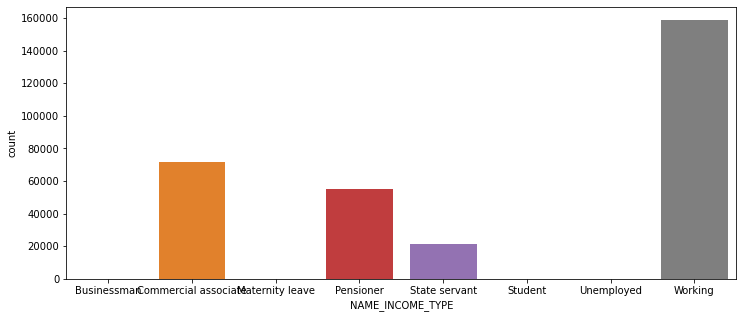

In [109]:
#NAME_INCOME_TYPE UNIVARIATE ANALYSIS
plt.figure(figsize=(12,5))
sns.countplot(x ='NAME_INCOME_TYPE', data = inp_app)
plt.show()
#Working has the highest and Commercial associate is the second highest here.

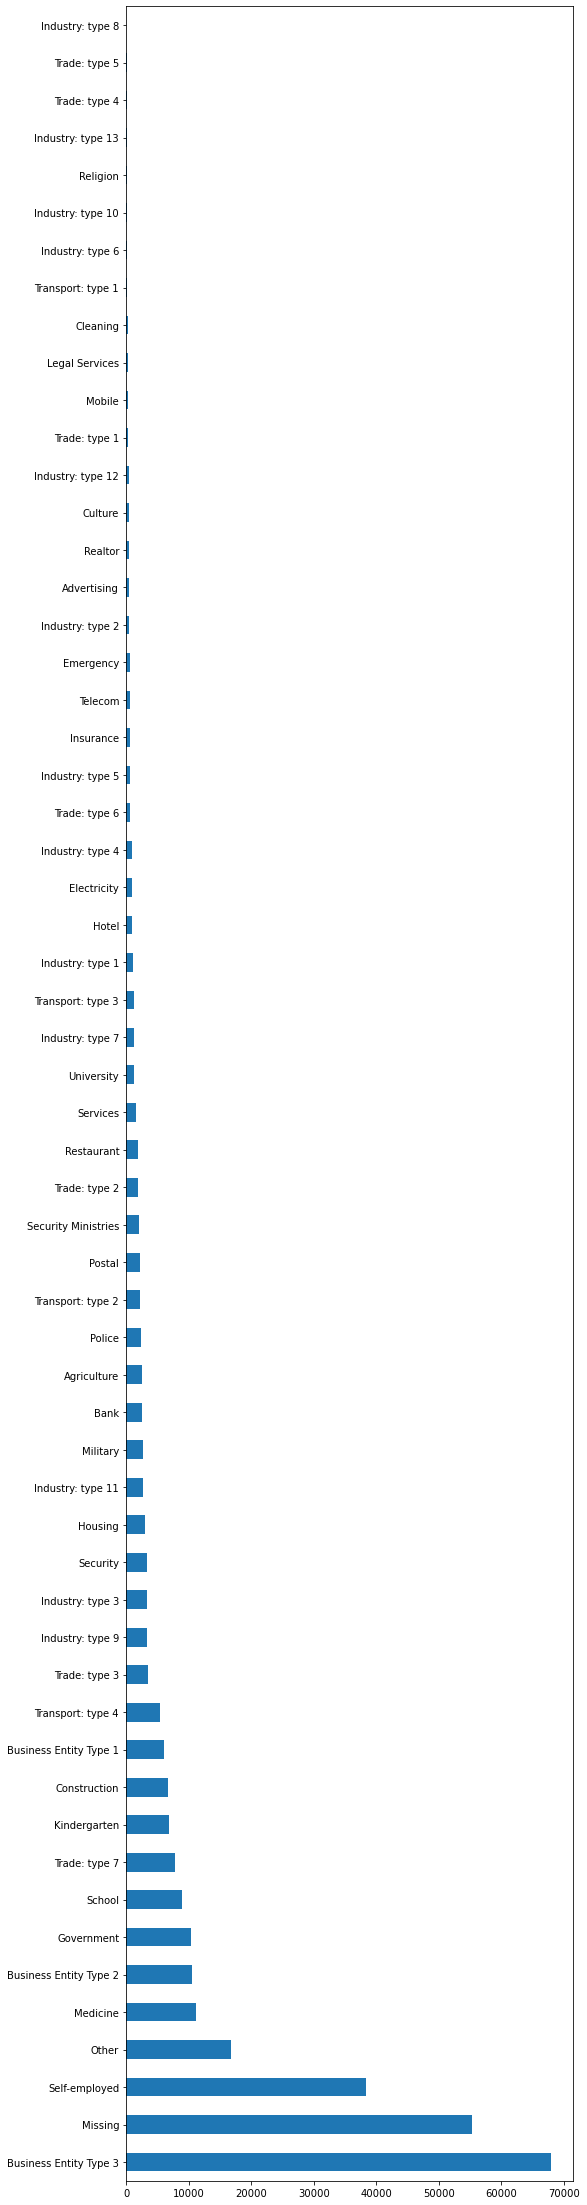

In [110]:
#ORGANIZATION_TYPE UNIVARIATE ANALYSIS
plt.figure(figsize=(8,40))
inp_app["ORGANIZATION_TYPE"].value_counts().plot.barh()
plt.show() 
#Business Tier 3 has the highest records

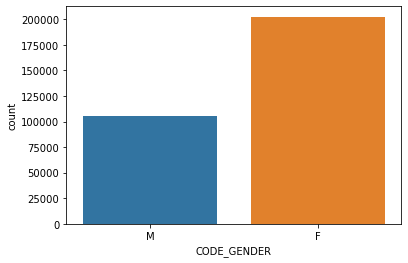

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(x ='CODE_GENDER', data = inp_app)
plt.show()
#Females are the highest applicants

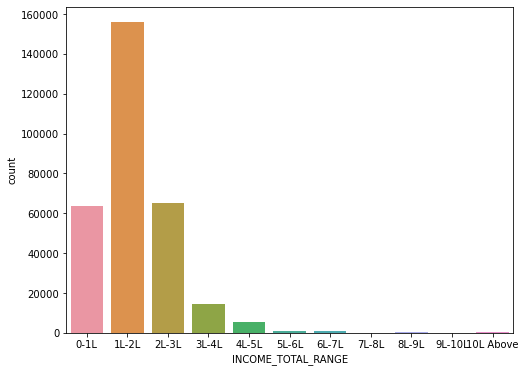

In [112]:
#INCOME_TOTAL_RANGE UNIVARIATE ANALYSIS
plt.figure(figsize=(8,6))
sns.countplot(x ='INCOME_TOTAL_RANGE', data = inp_app)
plt.show()
#Most of the applicants belong to 1L-2L Total Income Range

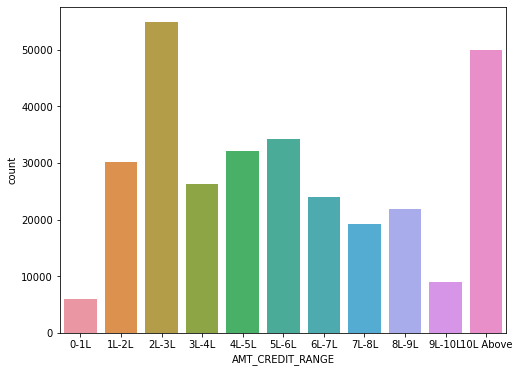

In [113]:
#AMT_CREDIT_RANGE UNIVARIATE ANALYSIS
plt.figure(figsize=(8,6))
sns.countplot(x ='AMT_CREDIT_RANGE', data = inp_app)
plt.show()
#Most of the applicants belong to 2L-3L Credit range

##### OUTLIERS IDENTIFICATION IN COLUMNS

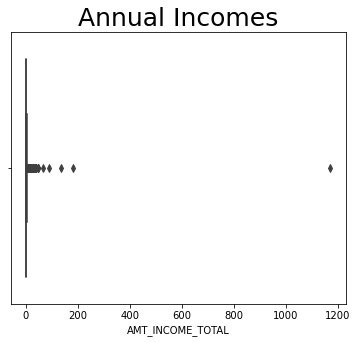

In [114]:
#AMT_INCOME_TOTAL OUTLIER IDENTIFICATION
plt.figure(figsize=(6,5))
plt.title("Annual Incomes",fontsize=25)
sns.boxplot(data=inp_app, x='AMT_INCOME_TOTAL')
plt.show()

#### There are some outliers where applicants has a huge Annual Income , which is Natural.

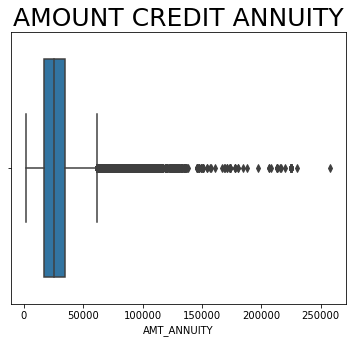

In [115]:
#AMT_ANNUITY OUTLIER IDENTIFICATION
plt.figure(figsize=(6,5))
plt.title("AMOUNT CREDIT ANNUITY",fontsize=25)
sns.boxplot(data=inp_app, x='AMT_ANNUITY')
plt.show()
#There are applicants with Loan Annuity around 75k. Also, there are outliers where applicants have loan annuity more than 2.5L

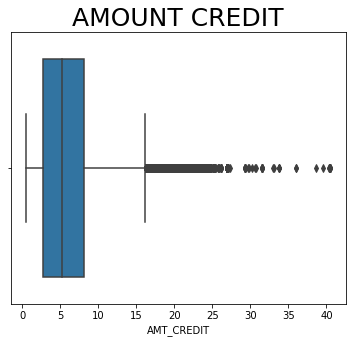

In [116]:
#AMT_CREDIT OUTLIER IDENTIFICATION
plt.figure(figsize=(6,5))
plt.title("AMOUNT CREDIT",fontsize=25)
sns.boxplot(data=inp_app, x='AMT_CREDIT')
plt.show()
#In this column, also, we can see Loan credit amount has some outliers.

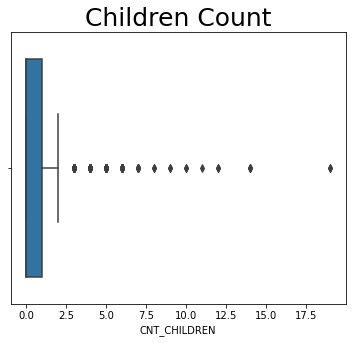

In [117]:
#CNT_CHILDREN OUTLIER IDENTIFICATION
plt.figure(figsize=(6,5))
plt.title("Children Count",fontsize=25)
sns.boxplot(data=inp_app, x='CNT_CHILDREN')
plt.show()
#We can see maximum of the applicants have either 0 or 1 child. Where as there are applicants who have more than 7 children.

In [118]:
# Changing field names to 'Defaulter' for 0 and 'Non-Defaulter' for 1
inp_app['TARGET'] = inp_app['TARGET'].replace([1],'Defaulter')
inp_app['TARGET'] = inp_app['TARGET'].replace([0],'Non - Defaulter')

#### DATA IMBALANCE CHECK IN TARGET COLUMN

In [119]:
inp_app['TARGET'].value_counts(normalize = True)

Non - Defaulter    0.91927
Defaulter          0.08073
Name: TARGET, dtype: float64

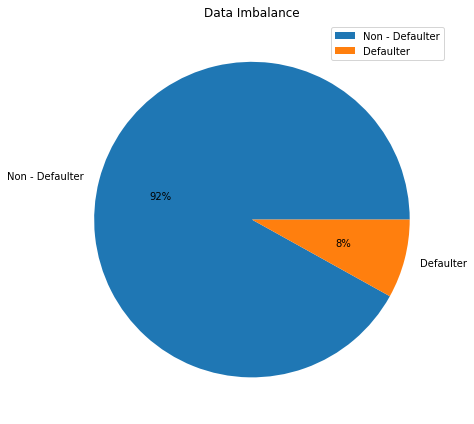

In [120]:
# Data Imbalance Pie Chart

plt.figure(figsize=(8,6))
plt.pie(inp_app.TARGET.value_counts(normalize=True), autopct='%1.f%%' , labels=inp_app.TARGET.value_counts().index)
plt.title("Data Imbalance")
plt.legend()
plt.tight_layout()
plt.show()

#### The dataset is imbalanced with 92% non-defaulters and 8% of defaulters as analyzed from TARGET column

In [121]:
# Changing field names to 'MALE' for M and 'FEMALE' for F
inp_app['CODE_GENDER'] = inp_app['CODE_GENDER'].replace(['M'],'MALE')
inp_app['CODE_GENDER'] = inp_app['CODE_GENDER'].replace(['F'],'FEMALE')

In [122]:
inp_app['CODE_GENDER'].value_counts()

FEMALE    202448
MALE      105059
Name: CODE_GENDER, dtype: int64

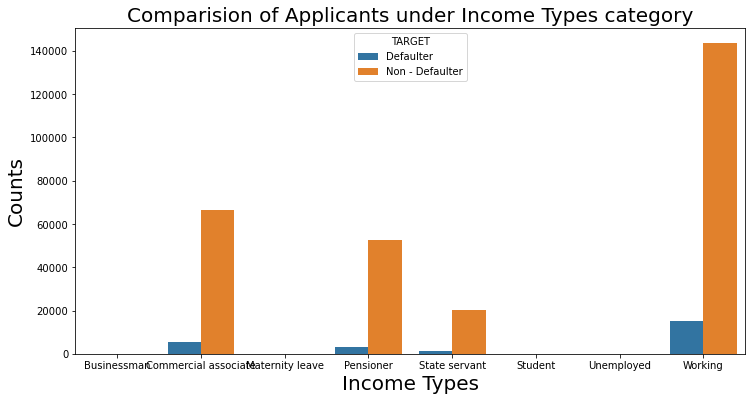

In [123]:
#TARGET vs NAME_INCOME_TYPE
plt.figure(figsize=(12,6))
sns.countplot(x=inp_app.NAME_INCOME_TYPE, hue=inp_app.TARGET)
plt.title("Comparision of Applicants under Income Types category", fontsize=20)
plt.xlabel("Income Types", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

#### As we can see maximum non-defaulter applicants belong to 'Working type'.

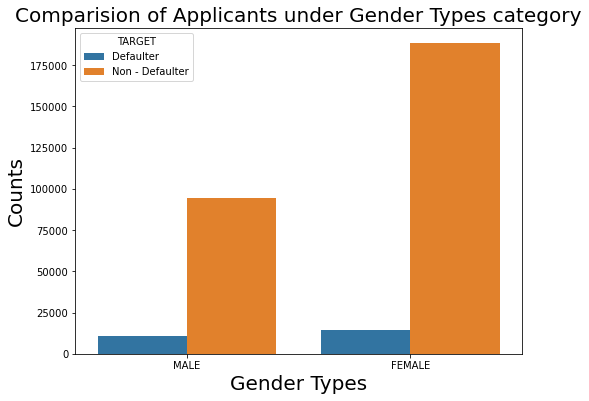

In [124]:
#TARGET vs CODE_GENDER
plt.figure(figsize=(8,6))
sns.countplot(x=inp_app.CODE_GENDER, hue=inp_app.TARGET)
plt.title("Comparision of Applicants under Gender Types category", fontsize=20)
plt.xlabel("Gender Types", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

#### In this case as well, we can conclude Maximum non-defaulters applicants are females.

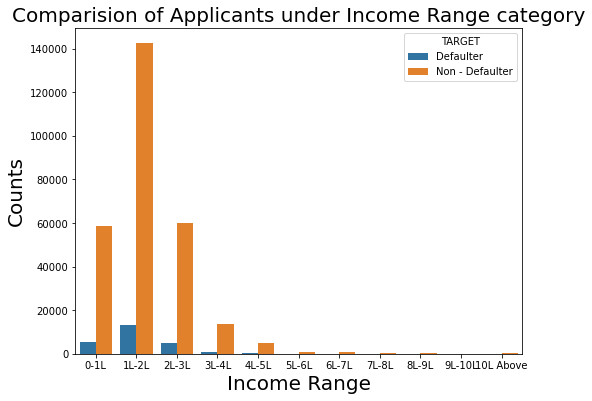

In [125]:
#TARGET vs INCOME_TOTAL_RANGE
plt.figure(figsize=(8,6))
sns.countplot(x=inp_app.INCOME_TOTAL_RANGE, hue=inp_app.TARGET)
plt.title("Comparision of Applicants under Income Range category", fontsize=20)
plt.xlabel("Income Range", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

#### Here, it is clear that applicants with income range 1L-2L have the highest 'Non-Defaulter' value.¶

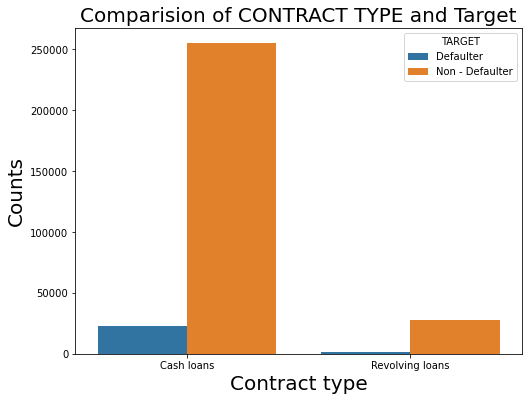

In [126]:
#Target vs NAME_CONTRACT_TYPE
plt.figure(figsize=(8,6))
sns.countplot(x=inp_app.NAME_CONTRACT_TYPE, hue=inp_app.TARGET)
plt.title("Comparision of CONTRACT TYPE and Target", fontsize=20)
plt.xlabel("Contract type", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

#### In the above graph, Cash loans are high in numbers where number of non-defaulters are high

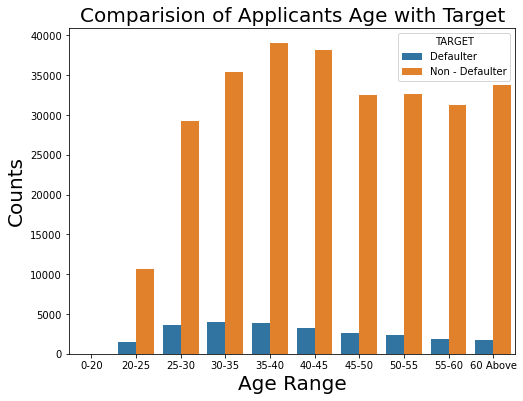

In [127]:
#TARGET vs AGE_RANGE
plt.figure(figsize=(8,6))
sns.countplot(x=inp_app.AGE_RANGE, hue=inp_app.TARGET)
plt.title("Comparision of Applicants Age with Target", fontsize=20)
plt.xlabel("Age Range", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()

#### Most of the Applicants with age above 60 are non-defaulters, they have less defaulting rate as compared to other categories.

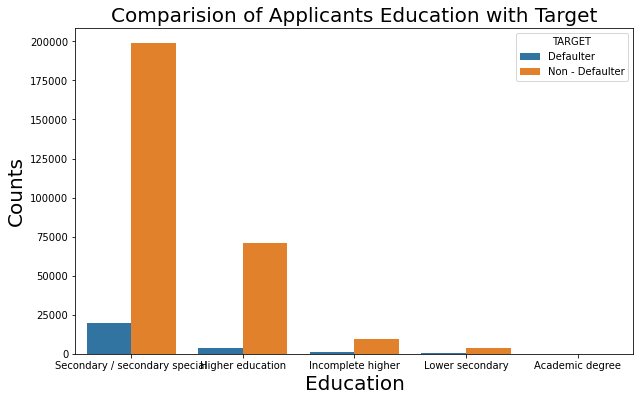

In [128]:
#TARGET vs NAME_EDUCATION_TYPE
plt.figure(figsize=(10,6))
sns.countplot(x=inp_app.NAME_EDUCATION_TYPE, hue=inp_app.TARGET)
plt.title("Comparision of Applicants Education with Target", fontsize=20)
plt.xlabel("Education", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show()
#NAME_EDUCATION_TYPE

As we can see, applicants with secondary education type are the highest non-defaulter applicants.
My Conclusion from application_data.csv Analysis:
NAME_INCOME_TYPE - Working and Commercial associates are the highest non-defaulters and Commercial associates are the highest defaulters.

GENDER_CODE - Females have the highest non-defaulters rate as compared to Males

INCOME_RANGE - People having annual income ranging in between 1L-2L are the highest non-defaulters as compared to people with annual income range of 0-1L.

CONTRACT_TYPE - Maximum non-defaulter loans were 'Cash loans'.

AGE_RANGE - Most of the Applicants with age Above 60 are non-defaulters.

EDUCATION_TYPE - Applicants with secondary education type are the highest non-defaulters.

#### Let's start previous_application.csv analysis

In [129]:
inp_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see there are a lot of missing values, NaN, and XNA

In [130]:
#Let's check the shape of the dataset
inp_prev.shape #1670214 rows and 37 columns

(1670214, 37)

In [131]:
inp_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [132]:
#Let's see the numeric distribution of columns
inp_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### As we can see there are many columns among 37 columns which needs fixing and standardising.

In [133]:
#checking for null values
inp_prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [134]:
# Null value % in Columns
(100*inp_prev.isnull().sum()/inp_prev.shape[0]).reset_index().rename\
(columns={"index":"Feature",0:"Missing Percentage"}).sort_values("Missing Percentage",\
                                                                 ascending=False).head(37)

,Feature,Missing Percentage
14,RATE_INTEREST_PRIVILEGED,99.643698
13,RATE_INTEREST_PRIMARY,99.643698
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
20,NAME_TYPE_SUITE,49.119754
36,NFLAG_INSURED_ON_APPROVAL,40.298129
35,DAYS_TERMINATION,40.298129
34,DAYS_LAST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
32,DAYS_FIRST_DUE,40.298129


In [135]:
#dropping columns with more than 50% missing values
inp_prev = inp_prev.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT"], axis = 1)

In [136]:
# Let's see if it worked
inp_prev.shape

(1670214, 33)

In [137]:
#Let's have a look at the null value columns 
inp_prev[["NAME_TYPE_SUITE","NFLAG_INSURED_ON_APPROVAL","DAYS_TERMINATION","DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT"]]

,NAME_TYPE_SUITE,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,0.0,-37.0,-42.0,300.0,-42.0,17145.0,1730.430,12.0
1,Unaccompanied,1.0,365243.0,365243.0,916.0,-134.0,607500.0,25188.615,36.0
2,"Spouse, partner",1.0,365243.0,365243.0,59.0,-271.0,112500.0,15060.735,12.0
3,NaN,1.0,-177.0,-182.0,-152.0,-482.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...
1670209,NaN,0.0,-351.0,-358.0,362.0,-508.0,267295.5,14704.290,30.0
1670210,Unaccompanied,0.0,-1297.0,-1304.0,-1274.0,-1604.0,87750.0,6622.020,12.0
1670211,"Spouse, partner",0.0,-1181.0,-1187.0,-1187.0,-1457.0,105237.0,11520.855,10.0
1670212,Family,1.0,-817.0,-825.0,-825.0,-1155.0,180000.0,18821.520,12.0


In [138]:
## We see Columns with days value are in negative, we need to find the absolute value for those columns
neg_columns = ["DAYS_TERMINATION","DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE"]
inp_prev[neg_columns]= abs(inp_prev[neg_columns])

In [139]:
#Noticed Some more columns with negative values, changing them to absolute values
inp_prev['DAYS_DECISION']=abs(inp_prev['DAYS_DECISION'])
inp_prev['SELLERPLACE_AREA']=abs(inp_prev['SELLERPLACE_AREA'])
inp_prev['DAYS_FIRST_DRAWING']=abs(inp_prev['DAYS_FIRST_DRAWING'])

In [140]:
#Let's see if that worked 
inp_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.148644e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127403e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [141]:
#The first column NAME_TYPE_SUITE has NaN values, Let's impute'Missing' in those fields
inp_prev["NAME_TYPE_SUITE"] = inp_prev["NAME_TYPE_SUITE"].fillna("Missing")

In [142]:
inp_prev[['NAME_TYPE_SUITE']]

,NAME_TYPE_SUITE
0,Missing
1,Unaccompanied
2,"Spouse, partner"
3,Missing
4,Missing
...,...
1670209,Missing
1670210,Unaccompanied
1670211,"Spouse, partner"
1670212,Family


#### OUTLIER IDENTIFICATION IN PREVIOUS_APPLICATION DATASET

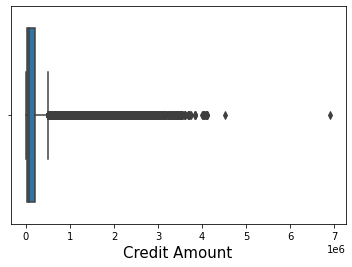

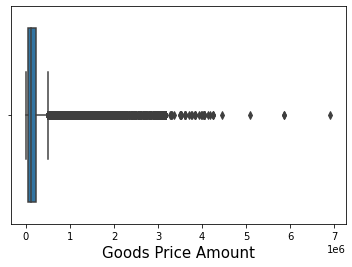

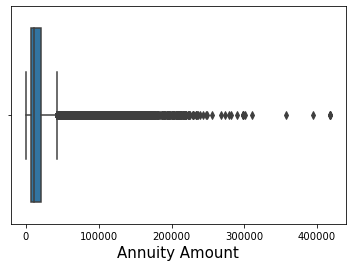

In [143]:
#AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY OUTLIER IDENTIFICATION
# Credit_Amount
sns.boxplot(data=inp_prev, x='AMT_CREDIT', orient='h')
plt.xlabel("Credit Amount", fontsize=15)
plt.show()

# Goods Price
sns.boxplot(data=inp_prev, x='AMT_GOODS_PRICE', orient='h')
plt.xlabel("Goods Price Amount", fontsize=15)
plt.show()

# Annuity Amount
sns.boxplot(data=inp_prev, x='AMT_ANNUITY', orient='h')
plt.xlabel("Annuity Amount", fontsize=15)
plt.show()

#### As expected, there are outliers in all the 3 columns.
In the Column 'AMT_ANNUITY', due to the presence of outliers, the missing values should be filled with the median, as mean wouldn't be suitable.

In [144]:
#Filling the NaN values with the median() value
inp_prev['AMT_ANNUITY'].fillna(inp_prev['AMT_ANNUITY'].median(),inplace = True)
inp_prev["AMT_ANNUITY"].isnull().sum()

0

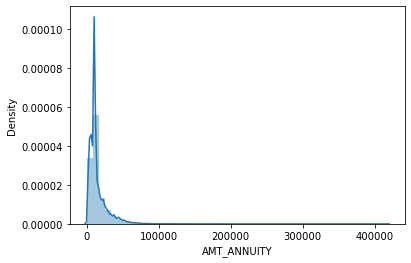

In [145]:
sns.distplot(inp_prev["AMT_ANNUITY"],hist=True)
plt.show()

In [146]:
# Let's look at the value count of column NAME_CASH_LOAN_PURPOSE
inp_prev['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

#### Let's Find Outliers for other columns as well

In [147]:
inp_prev.describe() #Let's look at the data again

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.148644e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127403e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


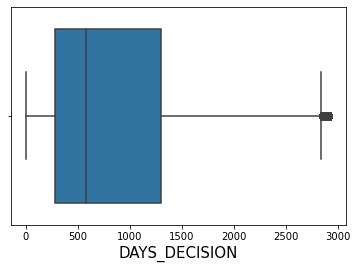

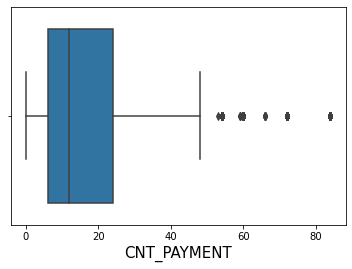

In [148]:
#DAYS_DECISION, CNT_PAYMENT OUTLIER IDENTIFICATION
# Previous Decission Days
sns.boxplot(data=inp_prev, x='DAYS_DECISION', orient='v')
plt.xlabel("DAYS_DECISION", fontsize=15)
plt.show()

#Previous Credit Payment
sns.boxplot(data=inp_prev, x='CNT_PAYMENT', orient='v')
plt.xlabel("CNT_PAYMENT", fontsize=15)
plt.show()

DAYS_DECISION has a few outliers and looks like most of the decission were made after 600 days of application. CNT_PAYMENT has some outliers as well, as, terms of previous credit might have taken long.

In [149]:
#Let's look at the columns of the dataset again
inp_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [150]:
inp_prev['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [151]:
# Most of the records are with values XNA and XAP 
# Let's Impute XNA and XAP with NA
inp_prev['NAME_CASH_LOAN_PURPOSE'] = inp_prev['NAME_CASH_LOAN_PURPOSE'].replace(['XAP'],'NA')
inp_prev['NAME_CASH_LOAN_PURPOSE'] = inp_prev['NAME_CASH_LOAN_PURPOSE'].replace(['XNA'],'NA')


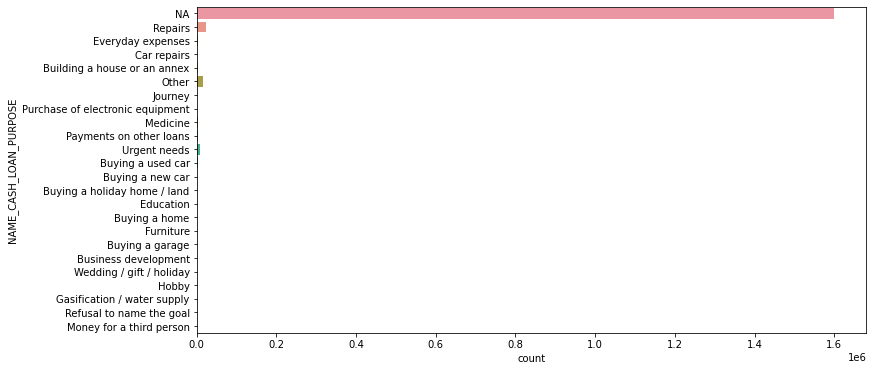

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(y ='NAME_CASH_LOAN_PURPOSE', data = inp_prev)
plt.show()

#### As we can see , the maximum loan was taken for repair purpose.

### Co-Relation between 10 columns from application_data.csv

In [161]:
inp_app[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AGE","YEARS_EMPLOYED","YEARS_REGST","YEARS_ID_PUB","YEARS_PHN_CHG"]].corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_EMPLOYED,YEARS_REGST,YEARS_ID_PUB,YEARS_PHN_CHG
CNT_CHILDREN,1.000000,0.012884,0.002151,0.021381,-0.001818,-0.330937,-0.241583,-0.183387,0.028014,0.005870
AMT_INCOME_TOTAL,0.012884,1.000000,0.156871,0.191658,0.159610,-0.027261,-0.063835,-0.027807,-0.008506,0.018585
AMT_CREDIT,0.002151,0.156871,1.000000,0.770137,0.986971,0.055434,-0.064322,-0.009623,0.006577,0.073699
AMT_ANNUITY,0.021381,0.191658,0.770137,1.000000,0.775110,-0.009447,-0.102855,-0.038517,-0.011265,0.063744
AMT_GOODS_PRICE,-0.001818,0.159610,0.986971,0.775110,1.000000,0.053444,-0.062267,-0.011568,0.009270,0.076307
AGE,-0.330937,-0.027261,0.055434,-0.009447,0.053444,1.000000,0.623943,0.331905,0.272689,0.082945
YEARS_EMPLOYED,-0.241583,-0.063835,-0.064322,-0.102855,-0.062267,0.623943,1.000000,0.214573,0.274844,-0.019160
YEARS_REGST,-0.183387,-0.027807,-0.009623,-0.038517,-0.011568,0.331905,0.214573,1.000000,0.101894,0.056986
YEARS_ID_PUB,0.028014,-0.008506,0.006577,-0.011265,0.009270,0.272689,0.274844,0.101894,1.000000,0.088580
YEARS_PHN_CHG,0.005870,0.018585,0.073699,0.063744,0.076307,0.082945,-0.019160,0.056986,0.088580,1.000000


#### Co-Relation between 4 columns of dataset previous_application.csv

In [170]:
inp_prev[["AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]].corr()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.811670,0.820474,0.394535
AMT_CREDIT,0.811670,1.000000,0.993087,0.674278
AMT_GOODS_PRICE,0.820474,0.993087,1.000000,0.672129
CNT_PAYMENT,0.394535,0.674278,0.672129,1.000000


#### My Analysis
-From previous_application.csv dataset I noticed that most of the loans were regarding repair purpose.
-There are many columns with outliers.
-All 4 columns above are positively co-related.



### SEGMENT ANALYSIS
Creating two segments for Target Column, Defaulter and Non-Defaulter

In [162]:
# Defaulter Segment Of TARGET Column
Defaulter=inp_app[inp_app.TARGET=='Defaulter']

# Non-defaulter segment of TARGET column
Non_Defaulter=inp_app[inp_app.TARGET=='Non-Defaulter']

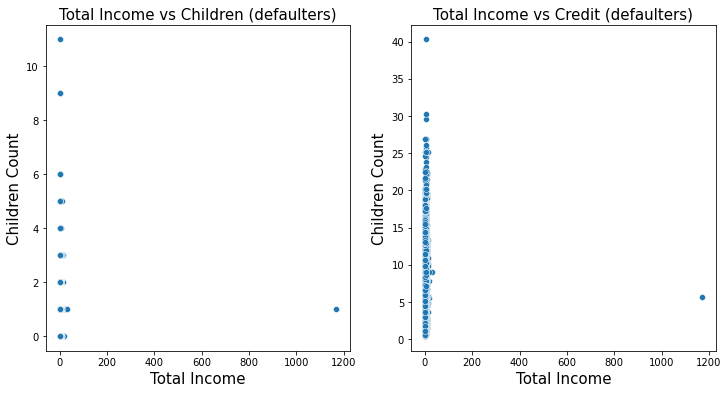

In [168]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Total Income vs Children (defaulters)", fontsize=15)
plt.ylabel("Children Count", fontsize=15)
plt.xlabel("Total Income", fontsize=15)
sns.scatterplot(Defaulter.AMT_INCOME_TOTAL, Defaulter.CNT_CHILDREN)
plt.subplot(1,2,2)
plt.title("Total Income vs Credit (defaulters)", fontsize=15)
plt.ylabel("Children Count", fontsize=15)
plt.xlabel("Total Income", fontsize=15)
sns.scatterplot(Defaulter.AMT_INCOME_TOTAL, Defaulter.AMT_CREDIT)
plt.show()



In [ ]:
#From the left graph, people with more children and less income are likely to default more.
#From the right graph, can conclude that All the defaulters belong to lower income group.


My Suggestion:
-People with lower total income are most likely to default. Please, avoid approving these loans.
-Applications with applicant having Lower secondary education should be rejected.
-Maximum People with a secondary education are non-defaulters.
-Working type applicants are less likely to default. 
-Applicants around age 30-45 are the highest among non-defaulters. 
